## tomography by fourier slice theorem
the fourier slice theorem states, that projecting an image (by integrating) and taking the 1D fourier transform is equal to a slice from the 2D fourier transform of the image.<br>
Therefore we can reconstruct an image from it's projections by interpolation in fourier space.

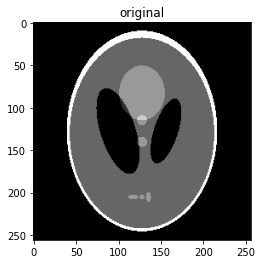

In [178]:
%reset -f
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate,misc
from scipy.ndimage import rotate
from scipy.interpolate import griddata
from PIL import Image

dim = 256
slices = 256

img = Image.open(r'./pics/shepp_logan_phantom.png')
img = img.resize((dim,dim))
img = np.array(img)

plt.imshow(img, cmap='gray')
plt.title('original')
plt.show()

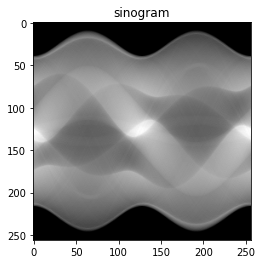

In [179]:
sinogram = np.zeros((dim,slices))

for a in range(slices):
    angle = a*360/(slices-1)
    sinogram[:,a] = np.sum(rotate(img, angle, reshape=False),axis=0)

plt.imshow(sinogram, cmap='gray')
plt.title('sinogram')
plt.show()

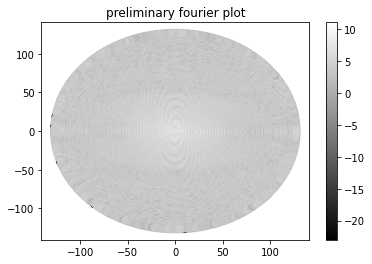

In [180]:
#fourier transform projection slices (sinograms)
fourier = np.fft.fftshift(np.fft.fft(np.fft.fftshift(sinogram,axes=0),axis=0),axes=0).flatten()

#coordinates of points
r = np.arange(dim) -dim/2
theta = np.linspace(0,2*np.pi,slices)
x_points = np.multiply( np.cos(theta).reshape(1,slices) , r.reshape(dim,1) ).flatten()
y_points = np.multiply( np.sin(theta).reshape(1,slices) , r.reshape(dim,1) ).flatten()

plt.scatter(x_points,y_points,c=np.log(np.abs(fourier)+1e-10),cmap='gray')
plt.colorbar()
plt.title('preliminary fourier plot')
plt.show()

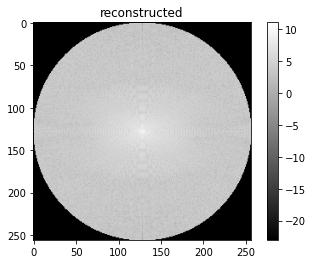

In [181]:
#interpolate 2D fourier coefficients from 1D slices
grid_x, grid_y = np.meshgrid(r,r)
interp = griddata((x_points,y_points), fourier, (grid_x, grid_y), method='cubic', fill_value=0)
interp[np.where(np.isnan(interp))[0]] = 0

plt.imshow(np.log(np.abs(interp)+1e-10), cmap='gray')
plt.title('reconstructed')
plt.colorbar()
plt.show()

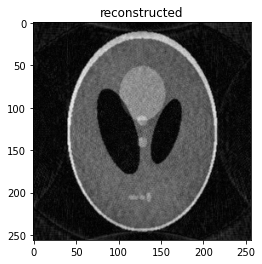

In [183]:
#reverse 2d fourier transform to compute the result
reconstructed = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(interp)))

plt.imshow(np.abs(reconstructed), cmap='gray')
plt.title('reconstructed')
plt.show()